In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")

In [6]:
df= pd.DataFrame(streeteasy)

In [8]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [10]:
X= pd.DataFrame(df[['size_sqft', 'building_age_yrs']])
y= pd.DataFrame(df[['rent']])

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state= 6)

In [14]:
model= LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [20]:
print(model.score(X_train, y_train))

0.7473347822985486


/Users/Surface1/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


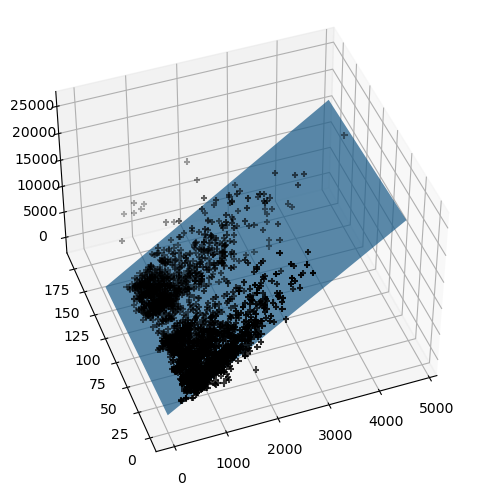

In [22]:
fig = plt.figure(1, figsize=(10, 6))
plt.clf()

elev = 43.5
azim = -110

ax = fig.add_subplot(111, projection='3d', elev=elev, azim=azim)
ax.scatter(X_train['size_sqft'], X_train['building_age_yrs'], y_train, c='k', marker='+')
ax.plot_surface(
    np.array([[0, 0], [4500, 4500]]),
    np.array([[0, 140], [0, 140]]),
    model.predict(np.array([[0, 0, 4500, 4500], [0, 140, 0, 140]]).T).reshape((2, 2)),
    alpha=0.7
)